In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Week_7_Activity_data.csv')

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
1,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
2,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
3,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989
4,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425


1.Check null values

In [4]:
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

This indicates that there is no missing values in each column

2. Examine the variables ‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’ and
   comment on your observations.

In [5]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441375,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177
75%,8.052969,216.441070,27182.587065,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175
max,14.000000,317.338124,56488.672410,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749


While describing the data we can see that the mean of turbidity is very less than the mean of other varibles present in the data

3.Examine the variables ‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’.

<AxesSubplot:ylabel='Frequency'>

<Figure size 576x576 with 0 Axes>

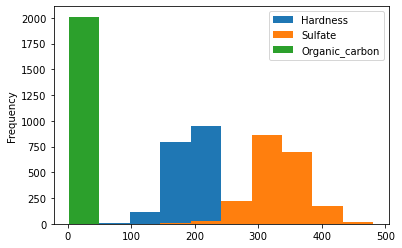

In [6]:
plt.figure(figsize=(8,8))
data[['Hardness','Sulfate','Organic_carbon']].plot.hist()

In [ ]:
From the above histogram it is clear that the varibles such as Hardness,Sulfate and Organic carbon of the data 
are distributed in the  range from 0 to 500 and 'hardness' is the most frequent variable in our data while comparing 
with the other two.

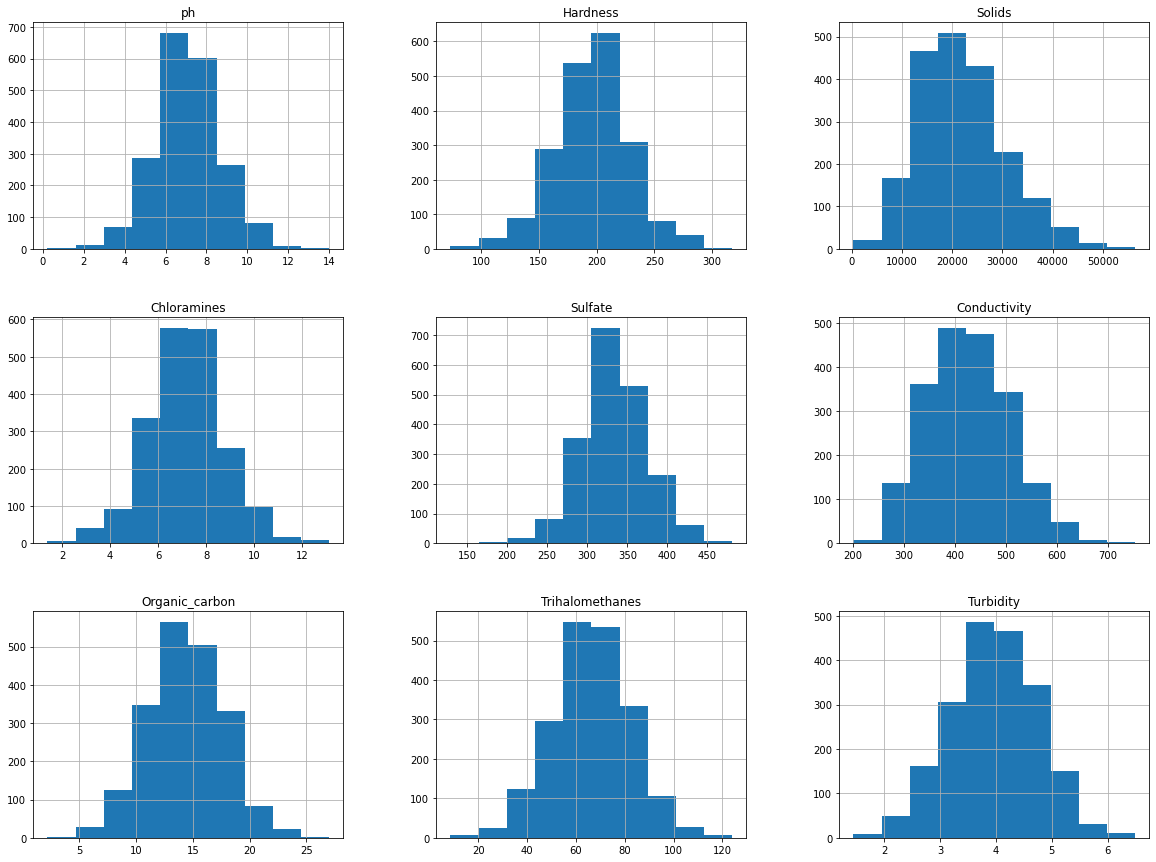

In [7]:
freqgraph=data.select_dtypes(include=['int32','int64','float'])
freqgraph.hist(figsize=(20,15))
plt.show()

From the histogram it is clear that most of the varible present in the data are normally distributed and
some of them are skewed positively as well as negatively.

4.Correlation analysis: ph and Chloramines

<AxesSubplot:>

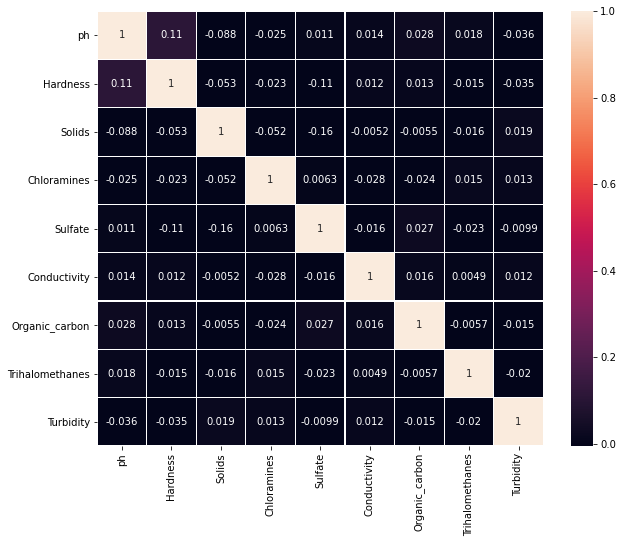

In [39]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix,vmin=-0.005,vmax=1,annot=True,linewidth=0.2)

The features of the data possess low positive correlation as well as low negative correlation.

In [10]:
x=data.corr()
x

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000


Creating a model

In [11]:
y=data['ph']
x=data.drop(['ph'],axis=1)

In [12]:
x.shape

(2011, 8)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [23]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [26]:
print(y_test)

1317     8.157518
526      8.296344
393      6.576845
1405     7.606067
433      5.393346
          ...    
534      4.692197
755      8.151249
1988     5.910540
1364     5.574756
408     10.015189
Name: ph, Length: 503, dtype: float64


In [25]:
print(predictions)

[7.28452049 6.92439307 6.92057022 7.46408997 6.92819299 6.82777995
 6.78792957 7.22226232 7.1667385  7.45104848 7.20113193 7.60556281
 7.1994104  7.0431868  6.66569816 6.63674649 7.31848411 6.94217299
 6.73447042 7.00903383 7.30986254 6.94428054 6.72314327 7.10493339
 6.80250218 6.95667852 7.0086543  6.98108173 6.8324206  7.34739224
 7.03983135 6.82846996 7.26177799 7.40447391 7.26853196 7.11512385
 7.32577447 6.61243671 6.92113599 6.91761526 7.31187065 6.77601327
 7.59583404 7.27488837 6.70045971 6.92010383 7.11370174 7.27129882
 7.06749918 6.99894394 6.91220671 6.90267449 7.24115227 7.30442214
 7.21496375 6.70643701 7.18854113 7.2988329  7.30387378 6.92617893
 7.13843541 7.04924021 6.81452573 7.20469935 6.87740777 6.92490624
 7.05057544 7.26243109 6.91992663 7.30080956 6.80710889 6.70594041
 7.09300396 6.96890535 7.44629654 7.11071859 7.13418097 7.11873997
 7.04704423 7.24467025 6.91646575 7.29821968 6.94482236 6.83042092
 6.77432987 6.67625857 7.19170583 7.04249148 7.1181815  7.2356

In [16]:
from sklearn.metrics import mean_squared_error

In [28]:
print('MSE is',mean_squared_error(y_test,predictions))

MSE is 2.5589853569884182


In [ ]:
We get the MSE as 2.55 ie,the difference between the observed and predicted value is 2.55

4.To check the correlation between the factors 
  a.ph and chloramines

In [35]:
from scipy.stats import pearsonr
ph=data['ph']
Chloramines=data['Chloramines']
Pearsonr_coefficient,P_value=pearsonr(ph,Chloramines)
print('Pearson correlation:%0.3f'%(Pearsonr_coefficient))

Pearson correlation:-0.025


The factors ph and chloramines have low negative correlation since it's value is less than -0.5

  b.ph and Conductivity

In [38]:
from scipy.stats import pearsonr
ph=data['ph']
Conductivity=data['Conductivity']
Pearsonr_coefficient,P_value=pearsonr(ph,Conductivity)
print('Pearson correlation:%0.3f'%(Pearsonr_coefficient))

Pearson correlation:0.014


In [ ]:
There is a low positive correlation between the factors ph and conductivity since it's value is less than 0.5.